In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import glob
from torch.utils.data import random_split
import torch.nn as nn
from collections import OrderedDict
from torchvision import models
import pickle

In [ ]:
DATA_DIR = "/content/drive/MyDrive/Deep Learning project/UTKFace"
TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 198
ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())

ID_GENDER_MAP, GENDER_ID_MAP, ID_RACE_MAP, RACE_ID_MAP

({0: 'male', 1: 'female'},
 {'male': 0, 'female': 1},
 {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'},
 {'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'others': 4})

In [ ]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_GENDER_MAP[int(gender)], ID_RACE_MAP[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [ ]:
DATA_DIR

'/content/drive/MyDrive/Deep Learning project/UTKFace'

In [ ]:
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))

In [ ]:
attributes = list(map(parse_filepath, files))

/content/drive/MyDrive/Deep Learning project/UTKFace/61_1_20170109150557335.jpg.chip.jpg
/content/drive/MyDrive/Deep Learning project/UTKFace/61_1_20170109142408075.jpg.chip.jpg
/content/drive/MyDrive/Deep Learning project/UTKFace/39_1_20170116174525125.jpg.chip.jpg
/content/drive/MyDrive/Deep Learning project/UTKFace/39_1_20170116174525125 (1).jpg.chip.jpg


In [ ]:
files

['/content/drive/MyDrive/Deep Learning project/UTKFace/9_0_0_20170110215848132.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/8_1_0_20170109201724457.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/76_0_0_20170111201015692.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/90_0_0_20170111211204031.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/83_0_2_20170112224652531.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/89_1_2_20170112224524948.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/75_0_0_20170111203745246.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/80_0_0_20170111221815342.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/88_1_0_20170105174941006.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFace/73_0_3_20170119212042841.jpg.chip.jpg',
 '/content/drive/MyDrive/Deep Learning project/UTKFa

In [ ]:
attributes

[(9, 'male', 'white'),
 (8, 'female', 'white'),
 (76, 'male', 'white'),
 (90, 'male', 'white'),
 (83, 'male', 'asian'),
 (89, 'female', 'asian'),
 (75, 'male', 'white'),
 (80, 'male', 'white'),
 (88, 'female', 'white'),
 (73, 'male', 'indian'),
 (89, 'male', 'white'),
 (7, 'female', 'white'),
 (90, 'female', 'white'),
 (76, 'female', 'asian'),
 (90, 'female', 'black'),
 (85, 'female', 'white'),
 (9, 'male', 'black'),
 (9, 'female', 'white'),
 (7, 'female', 'others'),
 (75, 'male', 'white'),
 (80, 'female', 'white'),
 (85, 'female', 'white'),
 (7, 'male', 'white'),
 (85, 'female', 'asian'),
 (85, 'female', 'indian'),
 (85, 'female', 'white'),
 (7, 'male', 'asian'),
 (74, 'male', 'white'),
 (83, 'male', 'white'),
 (85, 'female', 'white'),
 (8, 'male', 'white'),
 (8, 'female', 'white'),
 (9, 'male', 'white'),
 (80, 'male', 'white'),
 (85, 'female', 'white'),
 (90, 'male', 'asian'),
 (89, 'female', 'black'),
 (8, 'male', 'white'),
 (9, 'female', 'black'),
 (82, 'male', 'white'),
 (79, 'fem

In [ ]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.head()

,age,gender,race,file
0,9.0,male,white,/content/drive/MyDrive/Deep Learning project/U...
1,8.0,female,white,/content/drive/MyDrive/Deep Learning project/U...
2,76.0,male,white,/content/drive/MyDrive/Deep Learning project/U...
3,90.0,male,white,/content/drive/MyDrive/Deep Learning project/U...
4,83.0,male,asian,/content/drive/MyDrive/Deep Learning project/U...


In [ ]:
df.describe()

,age
count,23793.000000
mean,33.297735
std,19.878101
min,1.000000
25%,23.000000
50%,29.000000
75%,45.000000
max,116.000000


In [ ]:
df['age'].describe()

count    23793.000000
mean        33.297735
std         19.878101
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [ ]:
df = df[(df['age'] > 10) & (df['age'] < 65)]

In [ ]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * TRAIN_TEST_SPLIT)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.7)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

df['gender_id'] = df['gender'].map(lambda gender: GENDER_ID_MAP[gender])
df['race_id'] = df['race'].map(lambda race: RACE_ID_MAP[race])

max_age = df['age'].max()
len(train_idx), len(valid_idx), len(test_idx), max_age

(9115, 3907, 5581, 64.0)

In [ ]:
from keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, ages, races, genders = [], [], [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, age, gender, race = r['file'], r['age'], r['gender_id'], r['race_id']
            im = Image.open(file)
            im = im.resize((IM_WIDTH, IM_HEIGHT))
            im = np.array(im) / 255.0
            images.append(im)
            ages.append(age / max_age)
            genders.append(to_categorical(gender, 2))
            races.append(to_categorical(race, len(RACE_ID_MAP)))
            if len(images) >= batch_size:
                yield np.array(images), [np.array(ages), np.array(races), np.array(genders)]
                images, ages, genders, races = [], [], [], []
        if not for_training:
            break

In [ ]:
# # train_folder = "/content/drive/MyDrive/Deep Learning project/part1"
# # test_folder = "/content/drive/MyDrive/Deep Learning project/part3"
# # val_folder = "/content/drive/MyDrive/Deep Learning project/part2"


# with open('/content/drive/MyDrive/Deep Learning project/xtrain.pkl','rb') as file:
#   X_train = pickle.load(file)
# df_train = pd.read_pickle("/content/drive/MyDrive/Deep Learning project/ytrain.pkl")  

# with open('/content/drive/MyDrive/Deep Learning project/xval.pkl','rb') as file:
#   X_val = pickle.load(file)
# df_val = pd.read_pickle('/content/drive/MyDrive/Deep Learning project/yval.pkl')

# with open('/content/drive/MyDrive/Deep Learning project/xtest.pkl','rb') as file:
#   X_test = pickle.load(file)
# df_test = pd.read_pickle('/content/drive/MyDrive/Deep Learning project/ytest.pkl')


In [ ]:
# image_path_new=[]
# for j in os.listdir(image_folder):
#   image_path_new.append(os.path.join(image_folder, j))
#   # image_path = os.path.join(image_folder, j)
#   # img = cv2.imread(image_path)
  

In [ ]:
# new_ls=[]
# for i in range(len(image_path_new)):
#   new_ls.append(image_path_new[i].split('/')[-1])

In [ ]:
# new_ls1=[]
# for i in range(len(image_path_new)):
#   new_ls1.append(new_ls[i].split('.')[0])

In [ ]:
# new_ls1[1]

In [ ]:
# final_list=[]
# for i in range(len(image_path_new)):
#   final_list.append(new_ls1[i].split('_'))

  


In [ ]:
# df = pd.DataFrame(final_list,columns=['Age', 'Gender', 'Ethnicity','Unwanted'])

In [ ]:
# df

In [ ]:
# df.drop('Unwanted',axis=1,inplace=True)

In [ ]:
# df 

In [ ]:
# df.iloc[[1]]

In [ ]:
# transform = T.Resize((256,256))
# transform_tensor = T.Compose([T.PILToTensor()])


In [ ]:
# images=[]
# ages=[]
# # data=[]
# for j in os.listdir(image_folder):
#   image_path = os.path.join(image_folder, j)
#   img = cv2.imread(image_path)
#   # image = ndimage.imread(filepath, mode="RGB")
#   image_resized = cv2.resize(img,(256,256))
#   # tensor_image = transform_tensor(image_resized)
#   one = image_path.split('/')[-1]
#   two = one.split('.')[0]
#   save = two.split('_')
#   age,gender,race = [save[i] for i in (0,1,2)]
#   images.append(image_resized)
#   ages.append(age)
#   # data.append(image_resized,age)



In [ ]:
# images

In [ ]:
# ages

In [ ]:
# X = np.array([i for i in images])
# Y = np.array([j for j in ages])

In [ ]:
# X

In [ ]:
# X[0][0]

In [ ]:
# Y

In [ ]:
# plt.imshow(torch.rot90(X[0].T,3))

In [ ]:
# from glob import glob
# import cv2
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# import pickle
# import numpy as np

# from time import time

# from keras.layers import Conv2D, Dense, MaxPooling2D, Input, Flatten, Dropout, Activation, BatchNormalization, Add
# from keras import Model

# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

In [ ]:
# def getModel(version = 1):

#     if version==1: # Baseline

#         inp = Input(shape=(256, 256, 3,))

#         net = Conv2D(filters=16, strides=(2,2), kernel_size=(3,3))(inp)
#         net = BatchNormalization()(net)
#         net = Activation('elu')(net)
#         net = Dropout(0.5)(net)

#         net = Conv2D(filters=32, strides=(2,2), kernel_size=(3,3))(net)
#         net = BatchNormalization()(net)
#         net = Activation('elu')(net)
#         net = Dropout(0.5)(net)

#         net = Conv2D(filters=64, strides=(2,2), kernel_size=(3,3))(net)
#         net = BatchNormalization()(net)
#         net = Activation('elu')(net)
#         net = Dropout(0.5)(net)

#         net = Conv2D(filters=64, strides=(2,2), kernel_size=(3,3))(net)
#         net = BatchNormalization()(net)
#         net = Activation('elu')(net)
#         net = Dropout(0.5)(net)

#         net = Conv2D(filters=64, strides=(2,2), kernel_size=(3,3))(net)
#         net = BatchNormalization()(net)
#         net = Activation('elu')(net)
#         net = Dropout(0.5)(net)

#         net = Flatten()(net)

#         net = Dense(512, activation='relu')(net)
#         out = Dense(1, activation='softmax')(net)

#         model = Model(inputs=[inp], outputs=[out])
#         model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#         print(model.summary())

#         return model

In [ ]:
# def evaluate(p, y):

#     acc = 0

#     P_lab = np.argmax(p)
#     Y_lab = np.argmax(y)

#     for i in range(len(p)):
#         if np.argmax(p[i]) == np.argmax(y[i]):
#             acc += 1

#     return acc / len(p)

In [ ]:
# K = 5
# models = [getModel(version=1) for _ in range(K)]
# skf = StratifiedKFold(n_splits=K)
# skf.get_n_splits(X,Y)
# accuracies = []
# epochs = 20
# for e in range(epochs):

#     print('epoch', e+1)
#     A = []

#     for i, (train_index, test_index) in tqdm(list(enumerate(skf.split(X, Y)))):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = Y[train_index], Y[test_index]

#         print('\nfold ' + str(i))
#         models[i].fit(X_train, y_train, batch_size=64, validation_split=0.1)
#         # acc = models[i].evaluate(X_test, y_test)
#         preds = models[i].predict(X_test)
#         acc = evaluate(preds, y_test)
#         print('test accuracy', acc)
#         A.append(acc)

#     mA = np.mean(A)
#     sA = 0
#         # sA = np.std(A)

#     print("EPOCH", e, "accuracies:", mA, '+/-', sA)

#     accuracies.append( (mA, sA) )

#     print('Accuracies over epochs', accuracies)

In [ ]:
#FROM HEREEEEEEEEEEEEEEE






# def image_path(folder):
#   image=[]
#   for j in os.listdir(folder):
#     image.append(os.path.join(folder, j))
  
#   return image 

In [ ]:
# class UTKFace(Dataset):
#     def __init__(self, image_paths):
#         self.transform = T.Compose([T.Resize((32, 32)), T.ToTensor(), T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
#         self.image_paths = image_paths
#         self.images = []
#         self.ages = []
#         self.genders = []
#         self.races = []
        
#         for path in image_paths:
#             filename = path[51:].split("_")
            
#             if len(filename)==4:
#                 self.images.append(path)
#                 self.ages.append(int(filename[0]))
#                 self.genders.append(int(filename[1]))
#                 self.races.append(int(filename[2]))

#     def __len__(self):
#          return len(self.images)

#     def __getitem__(self, index):
#             img = Image.open(self.images[index]).convert('RGB')
#             img = self.transform(img)
          
#             age = self.ages[index]
#             gender = self.genders[index]
#             eth = self.races[index]
            
#             sample = {'image':img, 'age': age, 'gender': gender, 'ethnicity':eth}
            
#             return sample

In [ ]:
# test_image = image_path(test_folder)
# val_image = image_path(val_folder)
# train_image = image_path(train_folder)

In [ ]:
# trying = []
# for i in train_image:
#   trying.append(i[51:].split("_")[0])

In [ ]:
# len(set(trying)) 

In [ ]:
# train_dataloader = DataLoader(UTKFace(train_image), shuffle=True, batch_size= 16)
# # val_dataloader = DataLoader(UTKFace(val_image), shuffle=False, batch_size=16)
# test_dataloader = DataLoader(UTKFace(test_image), shuffle= False, batch_size= 16)

In [ ]:
# from glob import glob
# import cv2
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# import pickle
# import numpy as np

# from time import time

# from keras.layers import Conv2D, Dense, MaxPooling2D, Input, Flatten, Dropout, Activation, BatchNormalization, Add
# from keras import Model

# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

In [ ]:
# import torch
# import math
# import torch.nn as nn
# import torch.nn.functional as F

# class MultiTaskTransformer(nn.Module):
#     def __init__(self, num_classes_age, num_classes_gender, num_classes_ethnicity, hidden_size=256, num_layers=4, num_heads=4, dropout=0.1):
#         super(MultiTaskTransformer, self).__init__()

#         self.num_classes_age = num_classes_age
#         self.num_classes_gender = num_classes_gender
#         self.num_classes_ethnicity = num_classes_ethnicity

#         # CNN for image feature extraction
#         self.cnn = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Flatten()
#         )

#         # Transformer encoder for sequence modeling
#         self.embedding = nn.Embedding(10000, hidden_size)
#         self.pos_encoding = PositionalEncoding(hidden_size, dropout)
#         encoder_layer = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size, dropout)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)

#         # Fully connected layers for classification
#         self.fc_age = nn.Linear(hidden_size, num_classes_age)
#         self.fc_gender = nn.Linear(hidden_size, 1)
#         self.fc_ethnicity = nn.Linear(hidden_size, num_classes_ethnicity)

#     def forward(self, x):
#         # CNN for image feature extraction
#         x = self.cnn(x)
#         # x = x.unsqueeze(1)
#         # batch_size, seq_len, hidden_size = x.size(0), x.size(1), x.size(2) * x.size(3)

#         # # Transformer encoder for sequence modeling
#         # x = x.view(batch_size, seq_len, hidden_size)
#         x = x.view(x.size(0), -1)

#         # Transformer encoder for sequence modeling
#         x = self.embedding(x.long())
#         x = self.pos_encoding(x)
#         x = x.permute(1, 0, 2)
#         output = self.transformer_encoder(x)
#         output = output.permute(1, 0, 2)

#         # Fully connected layers for classification
#         output_age = F.softmax(self.fc_age(output[:, -1]), dim=1)
#         output_gender = F.softmax(self.fc_gender(output[:, -1]), dim=1)
#         output_ethnicity = F.softmax(self.fc_ethnicity(output[:, -1]), dim=1)
#         return output_age, output_gender, output_ethnicity



# class PositionalEncoding(nn.Module):
#     def __init__(self, d_model, dropout=0.1, max_len=5000):
#         super(PositionalEncoding, self).__init__()
#         self.dropout = nn.Dropout(p=dropout)

#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term)
#         pe[:, 1::2] = torch.cos(position * div_term)
#         pe = pe.unsqueeze(0).transpose(0, 1)
#         self.register_buffer('pe', pe)

#     def forward(self, x):
#         x = x + self.pe[:x.size(0):]
#         return self.dropout(x)

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = MultiTaskTransformer(99,2,5).to(device=device)

# ethnicity_loss = nn.CrossEntropyLoss()
# gender_loss = nn.BCELoss()
# age_loss = nn.L1Loss()
# sig = nn.Sigmoid()

# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.09)

In [ ]:
# total_correct_age = 0
# total_correct_gender = 0
# total_correct_eth = 0
# total_instances = 0
# with torch.no_grad():
#     for i, data in enumerate(tqdm(train_dataloader)):
      
#       inputs = data["image"].to(device=device)
    
#       age_label = data["age"].to(device=device)
#       gender_label = data["gender"].to(device=device)
#       # gender_label = F.one_hot(gender_label, num_classes=2)
#       eth_label = data["ethnicity"].to(device=device)

#       model.eval()
    
#       age_output, gender_output, eth_output = model(inputs)

#       print(sig(gender_output).round())
#       print(gender_label.float())
#       print(torch.eq(sig(gender_output).round().squeeze(),gender_label.float()))
#       # age_output_max = torch.argmax(age_output,dim =1)
#       # gender_output_max = torch.argmax(gender_output,dim =1)
#       eth_output_max = torch.argmax(eth_output,dim =1)

#       # print(age_output , age_label ,age_output_max)
#       # print(gender_output, gender_output_max, gender_label)
#       # print(eth_output, eth_output_max, eth_label)
      
#       # correct_age = sum(age_output_max==age_label).item()
#       correct_gender = torch.sum(torch.eq(sig(gender_output).round(),gender_label.unsqueeze(1).float())).item()
#       correct_eth = sum(eth_output_max==eth_label).item()
      
#       # total_correct_age += correct_age
#       total_correct_gender += correct_gender
#       total_correct_eth += correct_eth

#       total_instances += len(inputs)

# # age_acc = round(total_correct_age/total_instances, 3)
# gender_acc = round(total_correct_gender/total_instances, 3)
# eth_acc = round(total_correct_eth/total_instances, 3)
#       # images, labels = images.to(device), labels.to(device)

#       #-------------------------------------------------------------------------
#       #  making classifications and deriving indices of maximum value via argmax
#       #-------------------------------------------------------------------------
#       # classifications = torch.argmax(model(images), dim=1)

#       #--------------------------------------------------
#       #  comparing indicies of maximum values and labels
#       #--------------------------------------------------
#       # correct_predictions = sum(classifications==labels).item()

#       #------------------------
#       #  incrementing counters
#       #------------------------
#       # total_correct+=correct_predictions
#       # total_instances+=len(images)

In [ ]:
# from keras.utils import to_categorical

# age_train = np.array(df_train['age'])
# race_train = to_categorical(np.array(df_train['race_id']), 5)
# gender_train = to_categorical(np.array(df_train['gender_id']),2)

# age_val = np.array(df_val['age'])
# race_val = to_categorical(np.array(df_val['race_id']), 5)
# gender_val = to_categorical(np.array(df_val['gender_id']),2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Define the Transformer block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, num_heads, d_model, dropout_rate):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.dropout_rate = dropout_rate
        
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.layer_norm1 = tf.keras.layers.LayerNormalization()
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(4*d_model, activation='relu'),
            tf.keras.layers.Dense(d_model),
        ])
        self.layer_norm2 = tf.keras.layers.LayerNormalization()
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        
    def call(self, inputs, training):
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layer_norm1(inputs + attn_output)
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layer_norm2(out1 + ffn_output)
        
        return out2

# Define the Transformer encoder
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, num_heads, d_model, dropout_rate):
        super().__init__()
        self.num_layers = num_layers
        self.transformer_blocks = [TransformerBlock(num_heads, d_model, dropout_rate) for _ in range(num_layers)]
        
    def call(self, inputs, training):
        x = inputs
        for i in range(self.num_layers):
            x = self.transformer_blocks[i](x, training=training)
        return x

# Define the model architecture
num_age_classes = 1
num_gender_classes = 2
num_ethnicity_classes = 5
image_size = 198

inputs = tf.keras.layers.Input(shape=(image_size, image_size, 3))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
# x = tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal')(x)
# x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.02)(x)
# x = tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2)(x)
x = tf.keras.applications.mobilenet.preprocess_input(inputs)
x = tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
# x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(x)
print(x.shape)
x = tf.keras.layers.Reshape((6, 6, 256))(x)
x = TransformerEncoder(num_layers=4, num_heads=8, d_model=256, dropout_rate=0.1)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

age_output = tf.keras.layers.Dense(1, activation='softmax', name='age')(x)
gender_output = tf.keras.layers.Dense(2, activation='softmax', name='gender')(x)
ethnicity_output = tf.keras.layers.Dense(5, activation='softmax', name='ethnicity')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=[age_output,ethnicity_output, gender_output])
# loss_fn = SparseCategoricalCrossentropy()
# optimizer = Adam(learning_rate=0.001)
# metrics = [SparseCategoricalAccuracy()]

model.compile(optimizer='rmsprop', 
              loss={'age': 'mse', 'gender': 'categorical_crossentropy','ethnicity': 'categorical_crossentropy'},
              loss_weights={'age': 2., 'gender': 1., 'ethnicity': 1.5},
              metrics={'age': 'mae', 'gender': 'accuracy', 'ethnicity': 'accuracy'})

17225924/17225924 [==============================] - 0s 0us/step
(None, 6, 6, 256)


In [ ]:
# from keras.callbacks import ModelCheckpoint

# batch_size = 16
# valid_batch_size = 16
# # train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
# # valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

# callbacks = [
#     ModelCheckpoint("./model_checkpoint", monitor='val_loss')
# ]
# history = model.fit(x= X_train, y = [age_train,gender_train,race_train],
#                     epochs = 10,
#                     callbacks = callbacks,
#                     validation_data = (X_val, [age_val, gender_val, race_val])
#                     )

In [ ]:
from keras.callbacks import ModelCheckpoint

batch_size = 16
valid_batch_size = 16
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]

history = model.fit_generator(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=10,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

<ipython-input-60-59f766453d46>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/10
569/569 [==============================] - ETA: 0s - loss: 3.6778 - age_loss: 0.2577 - ethnicity_loss: 1.6061 - gender_loss: 0.7531 - age_mae: 0.4704 - ethnicity_accuracy: 0.3543 - gender_accuracy: 0.5065

569/569 [==============================] - 2826s 5s/step - loss: 3.6778 - age_loss: 0.2577 - ethnicity_loss: 1.6061 - gender_loss: 0.7531 - age_mae: 0.4704 - ethnicity_accuracy: 0.3543 - gender_accuracy: 0.5065 - val_loss: 3.4593 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4662 - val_gender_loss: 0.7471 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5197
Epoch 2/10
569/569 [==============================] - ETA: 0s - loss: 3.4415 - age_loss: 0.2579 - ethnicity_loss: 1.4817 - gender_loss: 0.7033 - age_mae: 0.4706 - ethnicity_accuracy: 0.3954 - gender_accuracy: 0.5093

569/569 [==============================] - 122s 214ms/step - loss: 3.4415 - age_loss: 0.2579 - ethnicity_loss: 1.4817 - gender_loss: 0.7033 - age_mae: 0.4706 - ethnicity_accuracy: 0.3954 - gender_accuracy: 0.5093 - val_loss: 3.4055 - val_age_loss: 0.2566 - val_ethnicity_loss: 1.4509 - val_gender_loss: 0.7159 - val_age_mae: 0.4684 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5197
Epoch 3/10
569/569 [==============================] - ETA: 0s - loss: 3.4236 - age_loss: 0.2577 - ethnicity_loss: 1.4722 - gender_loss: 0.6998 - age_mae: 0.4704 - ethnicity_accuracy: 0.4005 - gender_accuracy: 0.5088

569/569 [==============================] - 100s 176ms/step - loss: 3.4236 - age_loss: 0.2577 - ethnicity_loss: 1.4722 - gender_loss: 0.6998 - age_mae: 0.4704 - ethnicity_accuracy: 0.4005 - gender_accuracy: 0.5088 - val_loss: 3.3956 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4540 - val_gender_loss: 0.7017 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5197
Epoch 4/10
569/569 [==============================] - ETA: 0s - loss: 3.4121 - age_loss: 0.2577 - ethnicity_loss: 1.4664 - gender_loss: 0.6971 - age_mae: 0.4704 - ethnicity_accuracy: 0.4025 - gender_accuracy: 0.5114

569/569 [==============================] - 103s 181ms/step - loss: 3.4121 - age_loss: 0.2577 - ethnicity_loss: 1.4664 - gender_loss: 0.6971 - age_mae: 0.4704 - ethnicity_accuracy: 0.4025 - gender_accuracy: 0.5114 - val_loss: 3.3890 - val_age_loss: 0.2566 - val_ethnicity_loss: 1.4556 - val_gender_loss: 0.6924 - val_age_mae: 0.4684 - val_ethnicity_accuracy: 0.4042 - val_gender_accuracy: 0.5195
Epoch 5/10
569/569 [==============================] - ETA: 0s - loss: 3.4049 - age_loss: 0.2577 - ethnicity_loss: 1.4627 - gender_loss: 0.6956 - age_mae: 0.4704 - ethnicity_accuracy: 0.4033 - gender_accuracy: 0.5146

569/569 [==============================] - 103s 181ms/step - loss: 3.4049 - age_loss: 0.2577 - ethnicity_loss: 1.4627 - gender_loss: 0.6956 - age_mae: 0.4704 - ethnicity_accuracy: 0.4033 - gender_accuracy: 0.5146 - val_loss: 3.3832 - val_age_loss: 0.2564 - val_ethnicity_loss: 1.4520 - val_gender_loss: 0.6924 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4042 - val_gender_accuracy: 0.5197
Epoch 6/10
569/569 [==============================] - ETA: 0s - loss: 3.4010 - age_loss: 0.2578 - ethnicity_loss: 1.4604 - gender_loss: 0.6948 - age_mae: 0.4705 - ethnicity_accuracy: 0.4034 - gender_accuracy: 0.5157

569/569 [==============================] - 103s 182ms/step - loss: 3.4010 - age_loss: 0.2578 - ethnicity_loss: 1.4604 - gender_loss: 0.6948 - age_mae: 0.4705 - ethnicity_accuracy: 0.4034 - gender_accuracy: 0.5157 - val_loss: 3.3863 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4534 - val_gender_loss: 0.6933 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4042 - val_gender_accuracy: 0.4805
Epoch 7/10
569/569 [==============================] - ETA: 0s - loss: 3.3990 - age_loss: 0.2576 - ethnicity_loss: 1.4597 - gender_loss: 0.6943 - age_mae: 0.4703 - ethnicity_accuracy: 0.4034 - gender_accuracy: 0.5202

569/569 [==============================] - 104s 183ms/step - loss: 3.3990 - age_loss: 0.2576 - ethnicity_loss: 1.4597 - gender_loss: 0.6943 - age_mae: 0.4703 - ethnicity_accuracy: 0.4034 - gender_accuracy: 0.5202 - val_loss: 3.3839 - val_age_loss: 0.2564 - val_ethnicity_loss: 1.4524 - val_gender_loss: 0.6925 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5195
Epoch 8/10
569/569 [==============================] - ETA: 0s - loss: 3.3976 - age_loss: 0.2579 - ethnicity_loss: 1.4586 - gender_loss: 0.6940 - age_mae: 0.4706 - ethnicity_accuracy: 0.4032 - gender_accuracy: 0.5183

569/569 [==============================] - 102s 180ms/step - loss: 3.3976 - age_loss: 0.2579 - ethnicity_loss: 1.4586 - gender_loss: 0.6940 - age_mae: 0.4706 - ethnicity_accuracy: 0.4032 - gender_accuracy: 0.5183 - val_loss: 3.3889 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4554 - val_gender_loss: 0.6928 - val_age_mae: 0.4683 - val_ethnicity_accuracy: 0.4042 - val_gender_accuracy: 0.5197
Epoch 9/10
569/569 [==============================] - ETA: 0s - loss: 3.3958 - age_loss: 0.2577 - ethnicity_loss: 1.4580 - gender_loss: 0.6934 - age_mae: 0.4704 - ethnicity_accuracy: 0.4037 - gender_accuracy: 0.5223

569/569 [==============================] - 104s 184ms/step - loss: 3.3958 - age_loss: 0.2577 - ethnicity_loss: 1.4580 - gender_loss: 0.6934 - age_mae: 0.4704 - ethnicity_accuracy: 0.4037 - gender_accuracy: 0.5223 - val_loss: 3.3865 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4535 - val_gender_loss: 0.6934 - val_age_mae: 0.4682 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5192
Epoch 10/10
569/569 [==============================] - ETA: 0s - loss: 3.3950 - age_loss: 0.2577 - ethnicity_loss: 1.4574 - gender_loss: 0.6935 - age_mae: 0.4704 - ethnicity_accuracy: 0.4033 - gender_accuracy: 0.5224

569/569 [==============================] - 100s 177ms/step - loss: 3.3950 - age_loss: 0.2577 - ethnicity_loss: 1.4574 - gender_loss: 0.6935 - age_mae: 0.4704 - ethnicity_accuracy: 0.4033 - gender_accuracy: 0.5224 - val_loss: 3.3866 - val_age_loss: 0.2565 - val_ethnicity_loss: 1.4541 - val_gender_loss: 0.6924 - val_age_mae: 0.4683 - val_ethnicity_accuracy: 0.4045 - val_gender_accuracy: 0.5197


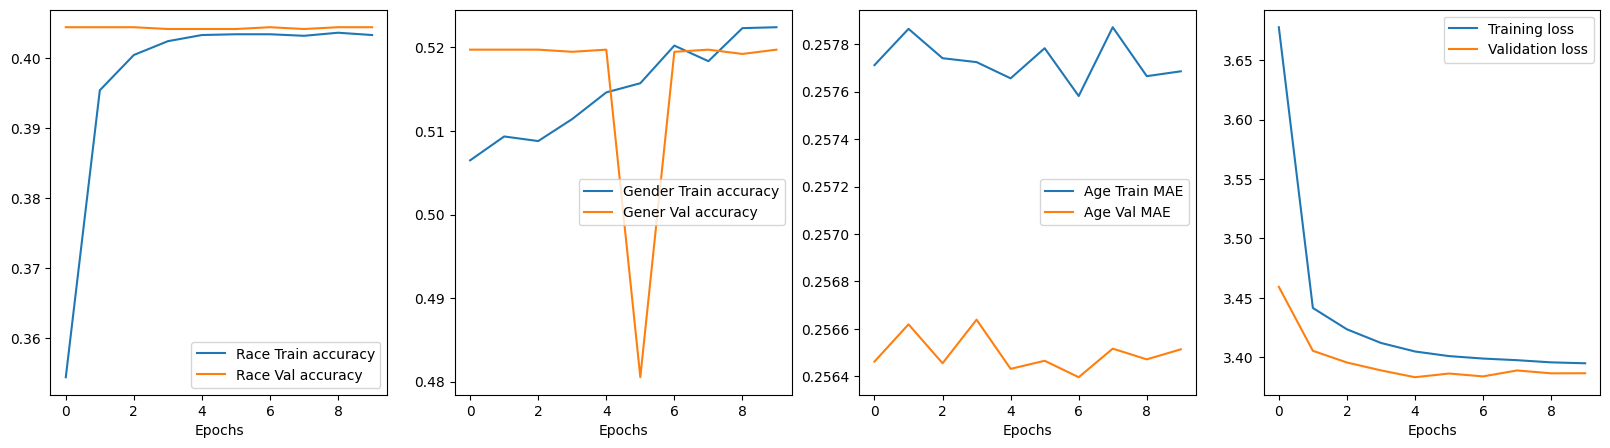

In [ ]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].plot(history.history['ethnicity_accuracy'], label='Race Train accuracy')
    axes[0].plot(history.history['val_ethnicity_accuracy'], label='Race Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['gender_accuracy'], label='Gender Train accuracy')
    axes[1].plot(history.history['val_gender_accuracy'], label='Gener Val accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['age_loss'], label='Age Train MAE')
    axes[2].plot(history.history['val_age_loss'], label='Age Val MAE')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

    axes[3].plot(history.history['loss'], label='Training loss')
    axes[3].plot(history.history['val_loss'], label='Validation loss')
    axes[3].set_xlabel('Epochs')
    axes[3].legend()

plot_train_history(history)

In [ ]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate_generator(test_gen, steps=len(test_idx)//128)))

<ipython-input-62-d6456e542e93>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  dict(zip(model.metrics_names, model.evaluate_generator(test_gen, steps=len(test_idx)//128)))


{'loss': 3.391108989715576,
 'age_loss': 0.25830987095832825,
 'ethnicity_loss': 1.455562710762024,
 'gender_loss': 0.691145122051239,
 'age_mae': 0.4698997437953949,
 'ethnicity_accuracy': 0.4089753031730652,
 'gender_accuracy': 0.5332485437393188}

In [ ]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, (age_true, race_true, gender_true)= next(test_gen)
age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)

In [ ]:
race_true, gender_true = race_true.argmax(axis=-1), gender_true.argmax(axis=-1)
race_pred, gender_pred = race_pred.argmax(axis=-1), gender_pred.argmax(axis=-1)
age_true = age_true * max_age
age_pred = age_pred * max_age

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for race")
print(classification_report(race_true, race_pred))

print("\nClassification report for gender")
print(classification_report(gender_true, gender_pred))

Classification report for race
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        50
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         7

    accuracy                           0.39       128
   macro avg       0.08      0.20      0.11       128
weighted avg       0.15      0.39      0.22       128


Classification report for gender
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        75
           1       0.00      0.00      0.00        53

    accuracy                           0.59       128
   macro avg       0.29      0.50      0.37       128
weighted avg       0.34      0.59      0.43       128



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat